In [12]:
import pandas as pd


In [13]:
df = pd.read_csv("archive/car_prices.csv", on_bad_lines='skip')

In [14]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [15]:
df.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [21]:
mode=df.mode().iloc[0]

In [22]:
df.fillna(mode, inplace=True)

In [24]:
df.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [28]:
import numpy as np
df.describe(include=(np.number))

,year,condition,odometer,mmr,sellingprice
count,558811.000000,558811.000000,558811.000000,558811.000000,558811.000000
mean,2010.038696,3.392337,68311.703027,13769.324646,13611.262461
std,3.966812,0.964586,53400.612967,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.600000,28361.500000,7100.000000,6900.000000
50%,2012.000000,3.500000,52247.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99104.500000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


<Axes: >

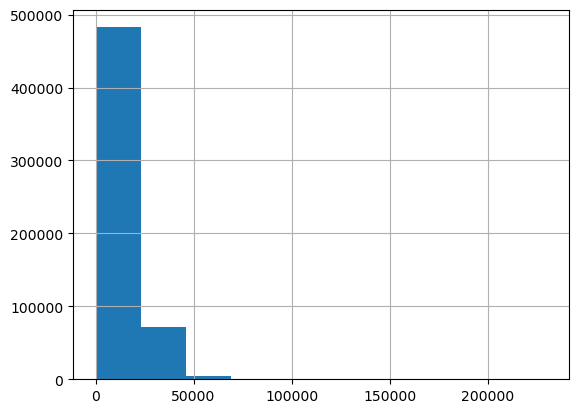

In [29]:
df['sellingprice'].hist()

In [32]:
df['Logprice']=np.log1p(df['sellingprice'])

<Axes: >

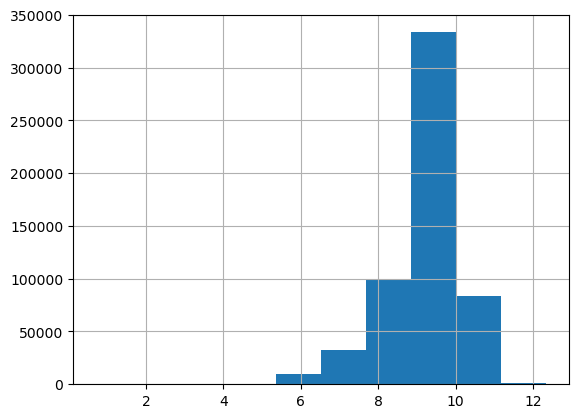

In [34]:
df['Logprice'].hist()


In [35]:
df.describe(include=[object])

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,558811,558811,558811,558811,558811,558811,558811,558811,558811,558811,558811
unique,96,973,1975,86,2,550296,38,20,17,14264,3745
top,Ford,Altima,Base,Sedan,automatic,wbanv13588cz57827,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,103855,29748,66468,212632,541267,5,82945,111719,245074,19693,5334


In [38]:
make = sorted(df.model.unique())
make


['1',
 '1 Series',
 '1500',
 '190-Class',
 '2 Series',
 '200',
 '200SX',
 '2500',
 '3',
 '3 Series',
 '3 Series Gran Turismo',
 '300',
 '300-Class',
 '3000GT',
 '300M',
 '300ZX',
 '300e',
 '320i',
 '323i',
 '328i',
 '350',
 '3500',
 '350Z',
 '350z',
 '360',
 '370Z',
 '4 Series',
 '4 Series Gran Coupe',
 '400-Class',
 '420-Class',
 '420sel',
 '42c',
 '458 Italia',
 '4Runner',
 '5 Series',
 '5 Series Gran Turismo',
 '500',
 '500-Class',
 '500L',
 '500e',
 '6',
 '6 Series',
 '6 Series Gran Coupe',
 '626',
 '7',
 '7 Series',
 '750i',
 '750li',
 '750lxi',
 '8 Series',
 '850',
 '9-2X',
 '9-3',
 '9-5',
 '9-7X',
 '911',
 '940',
 '960',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'ATS',
 'Acadia',
 'Accent',
 'Accord',
 'Accord Crosstour',
 'Accord Hybrid',
 'Achieva',
 'ActiveHybrid 5',
 'ActiveHybrid 7',
 'ActiveHybrid X6',
 'Aerio',
 'Alero',
 'Altima',
 'Altima Hybrid',
 'Amanti',
 'Amigo',
 'Armada',
 'Ascender',
 'Aspen',
 'Aspire',
 'Astra',
 'Astro',
 'Astro Cargo',
 'Aura',
 'Aura Hybri